<b>Discourse-Internal Network Analysis </b>
<br> Leah Nodar
<br><br>
<b>1. Introduction</b>

This project uses methodology based in social network analysis to map out the structure of a natural language conversation. Instead of the traditional network approach where ties indicate who talks TO who (e.g. Milroy 1980, Androutsopoulos 2013, Dodsworth and Benton 2017), I use ties to indicate who talks ABOUT who. I refer to these approaches as discourse-external and discourse-internal network analysis, respectively. Discourse-internal network analysis is a new way of looking at the internal structure of language data, and allows for a new understanding of social positionining in talk. This project is conceived of as a proof of concept and consists of descriptive analysis of four conversations, rather than hypothesis testing. First, however, some coding preliminaries. 

In [1]:
import os
import pandas as pd
from IPython.display import Audio
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
from operator import itemgetter
from IPython.display import Image
#os.chdir('C:/Users/Leah/Desktop/Com674_Spring2020/Final_Project/Code')
os.getcwd()

'C:\\Users\\Leah\\Desktop\\Com674_Spring2020\\Final_Project\\Code'

<b>2. Evaluation and Positioning</b>
<br>Everyday, casual conversation is centered largely around the discussion of people. We talk about what we and others do and say, and evaluate these words and actions. Speech can be divided into the narrating context, i.e. the current speech situation, and the narrated content, i.e. the subject under discussion (Wortham and Reyes 2015). A particular speaker will act at different times as an <i>interlocutor</i>, navigating the narrating context, a <i>narrator</i>, telling about the action in a story, and as a <i>character</i>, acting out the voices of people in the story (Goffman 1981). For example, in the following excerpt, Pamela first acts as an interlocutor, noting her own current laughter in line 1. She then shifts into the narrator role in lines 3-4 and 7-8, and finally shifts to being a character at line 9, as she voices her mother's speech. 
<br><br><i>EXAMPLE 1: YOU'LL BE SORRY (SBC05:438.59-457.75)</i><br> 
```
1) PAMELA:  hh [now I'm laughing]. 
2) DARRYL:     [What is] --
3) PAMELA:  hhh I'm thinking one thing my mother always used to say:, 
4)          when I wouldn' go bicycling with my [father], 
5) DARRYL:                                      [Pamela],
6)          you are [pshhhhh y(h)ou a(h)re]
7) PAMELA:          [sh(h)e would s(h)a(h)y],
8)          she w(h)ould say,
9)          .hhh (0.3) you'll be so:rry when we're de:ad.
10)         (0.3)
11) DARRYL: Becau(h)se you were[n't ↑bicycli:ng↑]?
12) PAMELA:                    [hhh ↑mmh↑]. Because I wouldn' go bicycling with my father.
```

In [2]:
Audio("../Audio/zyoullbesorry.wav")

The roles of narrator and character always entail evaluation. There are an infinite number of possible ways to describe any given instance of speech or action; the choices made carry evaluation of that speaker or actor. Line 9 in particular evaluates the mother as somewhat melodramatic (imagine a flat delivery of "she said that I would be sorry when they were dead" and contrast the audio here). The line then carries two voices: the mother's in the past, and Pamela's own evaluation in the current moment. Reported speech in dialogue is thus referred to as <i>double-voiced</i> (Bahktin 1981, Tannen 1985). 

The evaluation of a person's particular speech or actions in the past affects their social positioning in the present, that is, their location in shared social space: the perspective on that person that the speaker presents and invites their conversational partners to share. As Wortham and Reyes put it: “[d]escribing someone else’s speech or action provides a powerful opportunity to voice or characterize them in the narrated event, and speakers often do this in ways that have implications for evaluation, positioning, and social action in the narrating event” (2015:41). Evaluation of narrated content affects social positioning in the narrated context, but does not have a one-to-one equivalence with it. In Example 1, Pamela invites Darryl to join her in evaluating the mother as melodramatic in this situation, but it is not clear whether she is positioned as generally melodramatic. Contrast this with Example 2, where the voicing of Carolyn (not present) in line 2 is explictly taken up as a general social positioning in line 3, as something typical of her behavior. 
<br><br><i> EXAMPLE 2: “Potty Trained” (SBC31:604.13-606.645)<br></i>
```
1)  BTH:   I loved the little: () bit about the potty training hehhehe
2)  ROS:   Eight months old and [↓potty trained↓], oh my go:sh
3)  SHR:   		          [She always says that]
```

In [3]:
Audio("../Audio/zpottytrained.mp3")

In these two examples, the evaluation and positioning is accepted by the speaker's conversational partners. This is, of course, not always the case; positioning can be rejected or negotiated. In Example 3, Alice's positioning of Tim's as "bitching" is not accepted by Mary. Instead, after a long pause, she suggests additional factors that, if true, would make evaluating his speech as "bitching" inappropriate. 
<br><br><i>EXAMPLE 3: “Decorate the Tree” (SBC07:599.22-647.83)<br></i>
```
1)  ALC:   Oh=and you know another thing
2)         that Tim had the audacity to bitch about?
3)  MAR:   What.
4)        (5.3)
5)  ALC:   He said um,
6)	     (8.4) Mandy had to stay up all by herself and decorate the tree.
7)	     (6.8) until four in the morning.
8)        (4.1) 
9)	      An I even asked if we could put our ornaments on there,
10)	     and they told me that there wouldn't be enough room.
11)        (2.7)
12) MAR:   Really:?
13) ALC:   =mhm,
14)        (3.9)
15) 	    Tim said that.
16)        (7.6)
17) MAR:   She was probly lonely when she was doing it, you know that?
18)        (2.2)
19)        She probly was.
```

In [4]:
Audio("../Audio/zdecoratethetree.mp3")

The examples above, then, show three of the many possible ways that voicing a character in the narrated content interacts with positioning a person in the narrating context: in 1, a slightly negative evaluation is made and accepted, but social positioning is only implied, not spelled out; in 2, a negative evaluation is made, enthusiastically accepted, and directly carried to a negative social positioning; and in 3, a negative evaluation is made and rejected. In this work, I focus specifically on the evaluations of characters in the narrated content; investigating how that forms or does not form a social positioning in the narrating context is a key goal for my future research.
<br><br><b>3. Data and Hand-Coding Schema</b><br>
Data for this project is taken from the [Santa Barbara Corpus (SBC)](www.linguistics.ucsb.edu/research/santa-barbara-corpus) (Du Bois et al. 2000-2005). This is a free online corpus of some 60 recordings of natural language use, including both audio and transcripts. These are given in CHAT-CA format, which I here modify to more traditional Jeffersonian transcription for readability (MacWhinney 2000). I use the following four recordings: SBC006 "Cuz"; SBC007 "A Tree's Life"; SBC013 "Appease the Monster"; and SBC032 "Handshakes All Around." The first two are dyads (two people only), and the other two are conversations among 3-5 people. These are all selections of natural conversation without an institutional context (that is, they do not take place in a courtroom, classroom, or other area with institutional rules that affect speech).

The first step is transferring the given .chat transcript files to a more workable Excel format. I manually changed the file extensions to .txt, then transferred them to Excel: 

In [ ]:
filepath="C:/Users/Leah/Desktop/Com674_Spring2020/Final_Project/Transcripts/"
for filename in os.listdir("../Transcripts/"):
    #print(filename)
    table=pd.read_table(filepath+str(filename),names=("Times","Speakers","Utterance"))
    table.to_excel(filepath+filename[:6]+".xlsx")

I then hand-coded the transcripts for evaluation. Conversation is a continuous stream of speech, but humans separate out a particular section as, say, "an anecdote" easily, and without conscious thought. One of my long-term goals is to automate this segmentation of conversation, and to begin I break these recordings down into my own impression of constituent units, for later structural analysis. Thus in contrast to Nodar (2019), where I coded individual utterances by agent, I here coded intuitively the stretches of speech that felt to me like a coherent unit with one major instance of evaluation. For each such instance, I coded for the speaker; the evaluated subject; the overall valence of that evaluation; and whether that evaluation was accepted by conversational partners. 

Both the valence and the acceptance codings are simplifications. For valence, I coded only for whether the evaluation was clearly positive (1), clearly negative (-1), or neither (0). When in doubt, I coded as 0, for example in a report such as "Trish is pregnant again" (SBC13:214.55-215.51) that could be interpreted in multiple ways. Evaluations with a mixture of positive and negative elements were also coded as 0. 

This coding was done, to the extent possible, from the perspective of the speakers. For example, the action of ignoring one's mother could be (and in many stories is) evaluated negatively. In the following extract, however, between three men who are all named Tom, it is explicitly evaluated as "brilliant" and so coded "positive" in my dataset: 

<i>EXAMPLE 4: PASS THE BUTTER (SBC32:441.947-458.656)</i><br>
```
1)  TM2:   grandma was there, my mother was there,
2)         we sat around the dinner table,
3)	       .h and n- dinner was served,
4)	       and finally my mother said,
5)	       .h well tell me
6) 	       what did you do in a typical day in ↓Par↓is 
7)         ()
8)  TM1:   (TSK)
9)         ()
10) TM3:   m=↑hm↑=
11) TM2:   =made the most brilliant move of my life.
12) TM2:   [I said],
13) TM3:   [And you: s]aid. hhh
14) TM2:   Please pass the butter.
15) TM3:   hahahahahahaha
16) TM1:   hehheh
```

In [5]:
Audio("../Audio/zpassthebutter.mp3")

This also serves as an example of acceptance, coded 1, signaled by the laughter in lines 15-16 and by approving commentary (not included). Other acceptances vary from simple "mmhmm" to the strong acceptance and carry-through to a general positioning shown above in Example 2. Examples of rejection, coded -1, are negative tokens such as "no" and responses that specifically counter the evaluation, as in Example 3. Examples of neither, coded 0, are a lack of response, such as silence or switching to another topic without commentary. These are not necessarily a rejection, especially in situations where one story (with its evaluation) functions as set-up to another story that the speaker goes directly into. These recordings are also audio alone, without video, so some places coded as lack of response are likely acceptance signaled through visual cues, such as nodding. The dyads in this data are generally easier to code, as the speakers tend to come to an agreement about an evaluation before the conversation moves on. In larger groups there may not be consensus about the evaluation of a character; situations where some group members accept an evaluation and others do not are also coded 0. 

When present speakers are the evaluated subject (either when another present party talks about them, or they talk about themselves), that is indicated with an underscore and "CHAR" (i.e., as a character). To illustrate this schema, the four examples given so far would be coded as follows:

```
    Example    Speaker    Subject    Valence    Accepted
       1       PAMELA     MOM          -1          1
       2       ROSEMARY   CAROLYN      -1          1
       3       ALICE      TIM          -1          1
       4       TOM2       TOM2_CHAR     1          1 
```
(And in fact examples 3 and 4 are so coded in the data; examples 1 and 2 are from recordings not used in this analysis.) 

Completing the hand-coding gives me four transcripts with most lines containing only utterances, but this information occassionally appearing in columns L through O (once per evaluative chunk). The next step is to extract only this coding information from each spreadsheet, which I do by reading them into four Pandas dataframes. 

In [6]:
dflist={}
for filename in os.listdir("../Data/"):
    #print(filename)
    table=pd.read_excel("C:/Users/Leah/Desktop/Com674_Spring2020/Final_Project/Data/"+str(filename), usecols="L:O",names=("Speaker","Subject","Valence","Accepted"))
    table["Recording"]=filename[:6]
    table=table.dropna().reset_index(drop=True)
    dflist[filename[:6]]=table
display(dflist["sbc006"].head())

Speaker     Subject  Valence  Accepted Recording
0   ALINA        MIKE     -1.0       1.0    sbc006
1   ALINA        MIKE     -1.0       0.0    sbc006
2   ALINA        MIKE      0.0       0.0    sbc006
3   ALINA  ALINA_CHAR      0.0       1.0    sbc006
4   ALINA      HECTOR      0.0       1.0    sbc006

These dataframes serve as <i>edge lists</i>: lists of the ties present in a network. Right now, however, each evaluation is listed as a separate tie. For example, in the table above, the first three edges are three separate evaluations from Alina about Mike. For some of the measures I use below, it makes more sense to collapse these into a single edge with a weight equal to the number of evaluations. 

In [7]:
#list of edgelists
edgelistlist=list()
for df in dflist.values():
    accepted=df.groupby(["Speaker","Subject"]).Accepted.sum()
    valence=df.groupby(["Speaker","Subject"]).Valence.sum()
    weight=df.groupby(["Speaker","Subject"]).size()
    speaker=df.groupby(["Speaker","Subject"]).Speaker.first()
    subject=df.groupby(["Speaker","Subject"]).Subject.first()
    el = pd.DataFrame({'Source':speaker,
                       'Target':subject,
                       'Weight': weight,
                       'Valence': valence,
                       'Accepted': accepted,
                       'Recording': str(df["Recording"][0])})
    el=el.reset_index(drop=True)
    edgelistlist.append(el)
display(edgelistlist[0].head())

Source      Target  Weight  Valence  Accepted Recording
0  ALINA  ALINA_CHAR      38     21.0      23.0    sbc006
1  ALINA     ANTONIO       6     -6.0       5.0    sbc006
2  ALINA   ASSISTANT       1     -1.0       0.0    sbc006
3  ALINA     ATHLETE       1      1.0       0.0    sbc006
4  ALINA   BEARD_GUY       5      3.0       3.0    sbc006

At this point, both sets of edgelists can be turned into network objects using the NetworkX package. The speakers and their discussed subjects are the nodes or vertices in the network, and the evaluations are the edges. Valence, acceptance, and (in the aggregated networks) weight are attributes of the edges. The code below creates a list of NetworkX digraphs and multidigraphs, from the aggregated and separated evaluations datasets respectively.  The two different networks of SBC006 have the same number of nodes, but a very different number of edges. The "di-" stands for "directed": in both sets of networks an edge representing Alina evaluating Lenore is kept separate from an edge representing Lenore evaluating Alina.

In [8]:
netlist_agg=list()
netlist_sep=list()
for edgelist in edgelistlist:
    net = nx.from_pandas_edgelist(edgelist, 
                                  source='Source', 
                                  edge_attr=["Weight","Valence","Accepted","Recording"],
                                  target='Target',
                                  create_using=nx.DiGraph)
    #print(nx.info(net))
    netlist_agg.append(net)
for edgelist in dflist.values():
    net = nx.from_pandas_edgelist(edgelist, 
                                  source='Speaker', 
                                  edge_attr=["Valence","Accepted","Recording"],
                                  target='Subject',
                                  create_using=nx.MultiDiGraph)
    #print(nx.info(net))
    netlist_sep.append(net)
    
print(nx.info(netlist_agg[0]))
print(nx.info(netlist_sep[0]))

Name: 
Type: DiGraph
Number of nodes: 59
Number of edges: 62
Average in degree:   1.0508
Average out degree:   1.0508
Name: 
Type: MultiDiGraph
Number of nodes: 59
Number of edges: 191
Average in degree:   3.2373
Average out degree:   3.2373


<b> 4. Discourse-Internal Descriptive Network Statistics </b><br>
At this point, network analysis measures can be applied. However, not every measure common in social network analysis (SNA) can be meaningfully applied to this data, and at least one additional measure deserves inclusion. Three key points where discourse-internal network data differs from more common forms of network analysis are the irrelevance of paths; the fact that speakers can evaluate each other and others, but non-present others cannot evaluate speakers; and the importance of self-loops (a speaker evaluating their own speech/action). Many common statistics are therefore meaningless in this context: diameter, shortest path lengths, random walks, and so on. Below I consider the effect of these differences on the interpretation of several basic network measures, and develop an additional descriptive measure to address self-loops. I use the data from SBC006 to illustrate each measure.<br>

In [9]:
net06_agg=netlist_agg[0]
net06_sep=netlist_sep[0]

My understanding of these measures as used in SNA is based in Luke (2015). Information on using these in NetworkX comes from the [NetworkX documentation](https://networkx.github.io/documentation/networkx-1.10/index.html) (Hagberg, Schult, and Swart 2008), more StackOverflow searches than I could possibly cite, and the following tutorials:
- https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/
- https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python
- https://www.geeksforgeeks.org/directed-graphs-multigraphs-and-visualization-in-networkx/

<i> 1) Size.</i><br> 
The simplest descriptive measure of a network is its size: the number of nodes and number of edges. This requires no special modification for a discourse-internal network, though as noted above the number of edges will be very different depending on whether each evaluation is counted as an edge or evaluations are aggregated by speaker-subject pair. 

In [10]:
print("Number of Nodes:", len(net06_agg.nodes))
print("Number of Edges by Evaluation:", len(net06_sep.edges))
print("Number of Edges Aggregated by Pair:", len(net06_agg.edges))

Number of Nodes: 59
Number of Edges by Evaluation: 191
Number of Edges Aggregated by Pair: 62


<i> 2) Density.</i> <br>
Density is a measure of closure in the network. It is generally the proportion of the number of ties in the network to the number of all possible ties in the network (if every node was connected to every other node). This creates difficulty in the current dataset, because it is not actually possible for all nodes to connect to each other. If Speaker A talks about two other people, C and D, both not present, then there is no possibility of a tie between C and D. However, there could be a tie from a second speaker, Speaker B, to C, D, or both. It is necessary, then, to reduce the number of ties in the denominator to only those originating from people present in the conversation. 

The easiest way to do this is by treating this as bipartite data. Bipartite data is a term for data with a strict delineation between two sets, here speakers and evaluated subjects, and that only allows ties from one group to the other. This is normally done when the two sets are entirely different, for example students and college courses (with a tie between each student and the courses they have taken, and no ties directly from student to student or course to course). For the current dataset, of course, speakers can and do evaluate each other and themselves. This is the motive behind designating present speakers differently when they are evaluated as subjects, with the underscore-CHAR marker. 

NetworkX does not have a separate network class for bipartite data. Instead, it's necessary to add a node attribute "bipartite" coded 0 or 1 for the two sets. One option for doing this would be to manually code each person in the data as a speaker or a non-speaker, either in a Python dictionary or in a separate node-attribute spreadsheet, and attach that information to the network object. However, for this kind of data there is a shortcut available. The whole point is that ties are exclusively from speakers to subjects; I therefore create the bipartite partition by designating any node that has outdegree greater than 0 as a speaker, and those that have outdegree 0 as non-speakers.

In [11]:
for net in netlist_agg:
    bivalues={}
    for node in net.nodes:
        if net.out_degree(node)>0:
            #print(node)
            bivalues[node]=1
        else:
            bivalues[node]=0
    #print(bivalues.values())
    nx.set_node_attributes(net, bivalues, "bipartite")
    #print(nx.get_node_attributes(net, 'bipartite'))

Since density is counted by dividing existing ties by possible ties, it only makes sense to use this measure on the aggregated data (since for example whether Alina has one, two, or more ties to Mike does not affect closure in the network). 

In [12]:
net06_agg=netlist_agg[0]
top_nodes06 = set(n for n,d in net06_agg.nodes(data=True) if d['bipartite']==0)
bottom_nodes06 = set(net06_agg) - top_nodes06

display(bipartite.density(net06_agg, top_nodes06))

0.2719298245614035

<i> 3) Degree centrality.</i> <br>
This and all remaining measures discussed are actor-level measures. Unlike the network-level measures above, which measure the size and closure of the network as a whole, these are measures of the characteristics of particular nodes, here the speakers. For degree centrality I again use the bipartite partition of the network into speakers and subjects. A speaker's degree centrality is given by the proportion of the number of subjects they evaluate to the total number of evaluated subjects.

In [13]:
degcent=bipartite.degree_centrality(net06_agg, bottom_nodes06)
for node in bottom_nodes06:
    print(node, degcent[node])

LENORE 0.12280701754385964
ALINA 0.9649122807017543


<i> 4) Betweenness centrality/Exclusivity.</i> <br> 
Generally in SNA, betweenness centrality is an actor-level measure of control of the flow of information or resources in a network. The point is to find "bottlenecks," particular nodes that information or resources must flow through in order to reach other parts of the network. This is done by finding the shortest path between each pair of nodes, and for every node determining what proportion of these shortest paths go through that node. For a discourse-internal network, however, all paths have a distance of 1, and so this measure is unhelpful:

In [14]:
betwcent=bipartite.betweenness_centrality(net06_agg, bottom_nodes06)
for node in bottom_nodes06:
    print(node, betwcent[node])

LENORE 0.0
ALINA 0.0


Instead, I define a new statistic, <i>exclusivity</i>, intended to capture similar information about bottlenecks within the network. A speaker's exclusivity is the proportion of subjects that that speaker is the only speaker to evaluate, i.e., that that speaker evaluates exclusively, to the total number of evaluated subjects. 

In [15]:
def exclusivity(net, bottom_nodes):
    bottom = set(bottom_nodes)
    top = set(net) - bottom
    m = float(len(top))
    exclusive_subjects=list()
    for node in top:
        if dict(net.in_degree())[node]!=1: continue
        else: exclusive_subjects.append(node)
    #print(exclusive_subjects)
    excl_dict={}
    for speaker in bottom:
        i=0
        for node in exclusive_subjects:
            if net.get_edge_data(speaker, node, default=0)!=0:
                i += 1
            #print(node, i)
        excl_dict[speaker]=i/m
    return excl_dict

In [16]:
exclusive=exclusivity(net06_agg, bottom_nodes06)
for node in bottom_nodes06:
    print(node, exclusive[node])

LENORE 0.03508771929824561
ALINA 0.8771929824561403


<i> 5) Indegree and outdegree.</i> <br> 
These are relatively straightforward statistics: the number of ties coming in to or going out from a particular node, which would apply here to subjects and speakers, respectively. While indegree of evaluated subjects could be an interesting way to look at who is a particularly common or contentious subject of discussion, for now I focus on outdegree from speakers. In this measure, unlike the previous measures, it makes more sense to use the networks with separate ties for each evaluation. For most degree-relevant purposes having e.g. three evaluations from Alina to Mike should be counted the same as Alina evaluating three different people. 

In [17]:
for node in bottom_nodes06:
    print(node, dict(net06_sep.out_degree())[node])

LENORE 13
ALINA 178


<i> 6) Self-Determination.</i><br>
Finally, I construct a measure, self-determination, to account for the importance of self-loops. This measure is the proportion of evaluations of a present speaker by that same speaker to the total number of evaluations of that person from all speakers. 

As noted above, for this dataset I hand-coded separate designations for speakers when they are an evaluated subject in the narrated content, e.g. "ALINA" and "ALINA_CHAR," in order to facilitate the bipartite measures. For datasets where this is <i>not</i> the case, such that Alina evaluating her own actions would be an edge from "ALINA" to "ALINA," the edge would be recognized by NetworkX as a self-loop, in which case coding for self-determination is straightforward. I include that code here, although it is not relevant to this dataset, because it is more elegant. 

In [ ]:
#def selfdet(net):
#    selfdetlist={}
#    for node in list(net.nodes_with_selfloops()):
#        i=0
#        for loop in list(net.selfloop_edges()):
#            if loop[0]==node:
#                i+=1
#            selfdet=i/dict(net.in_degree())[node]
#        selfdetlist[node]=selfdet
#    return selfdetlist

For this dataset, however, it is necessary to connect speakers to their "SPEAKER_CHAR" counterpart in the evaluated subjects nodes. 

In [18]:
def selfdetermination(net, bottom_nodes):
    bottom = set(bottom_nodes)
    top = set(net) - bottom
    selfdetlist={}
    for speaker in bottom:
        for node in top:
            if node[:-5]==speaker and net.get_edge_data(speaker, node, default=0)!=0:
                i=len(net.get_edge_data(speaker, node, default=0))
            elif node[:-5]==speaker and net.get_edge_data(speaker, node, default=0)==0:
                i=0
            else: continue
            selfdet=i/dict(net.in_degree())[node]
            selfdetlist[speaker]=selfdet
    return selfdetlist

In [19]:
for node in bottom_nodes06:
    print(node, selfdetermination(net06_sep, bottom_nodes06)[node])

LENORE 1.0
ALINA 0.9743589743589743


<b>5. Application of Discourse-Internal Network Statistics</b><br>
In the following two sets of code, the descriptive measures discussed above are applied to all four conversations. First are the measures that characterize the network as a whole and then those that apply at the actor level to the speakers. 

In [20]:
netstats={}
for net in netlist_agg:
    top_nodes = set(n for n,d in net.nodes(data=True) if d["bipartite"]==0)
    bottom_nodes = set(net) - top_nodes
    netfile=list(nx.get_edge_attributes(net, "Recording").values())[0]
    density=bipartite.density(net, bottom_nodes)
    numnodes=len(net.nodes)
    numedges_agg=len(net.edges) 
    for net2 in netlist_sep:
        if netfile!=list(nx.get_edge_attributes(net2, "Recording").values())[0]: continue
        else: numedges_sep=len(net2.edges)
    netstats[netfile]={"Number of Nodes":numnodes,
                       "Total Edges":numedges_sep,
                       "Aggregated Edges":numedges_agg,
                       "Density":density}
#print(netstats)
netstats_df = pd.DataFrame(netstats).T
display(netstats_df)

Number of Nodes  Total Edges  Aggregated Edges   Density
sbc006             59.0        191.0              62.0  0.271930
sbc007             25.0         96.0              32.0  0.347826
sbc013             29.0        238.0              52.0  0.216667
sbc032             31.0        145.0              45.0  0.267857

In [21]:
actorstats={}
for net in netlist_agg:
    top_nodes = set(n for n,d in net.nodes(data=True) if d["bipartite"]==0)
    bottom_nodes = set(net) - top_nodes
    netfile=list(nx.get_edge_attributes(net, "Recording").values())[0]
    degcent=bipartite.degree_centrality(net, bottom_nodes)
    excl=exclusivity(net, bottom_nodes)
    for net2 in netlist_sep:
        if netfile!=list(nx.get_edge_attributes(net2, "Recording").values())[0]: continue
        else: 
            indeg_dict=dict(net2.in_degree())
            outdeg_dict=dict(net2.out_degree())
            selfdet=selfdetermination(net2, bottom_nodes)
    for node in bottom_nodes:
        actorstats[node]={"Recording":netfile,
                          "Degree Centrality":round(degcent[node],3),
                          "Exclusivity":round(excl[node],3),
                          "Indegree":indeg_dict[node+"_CHAR"],
                          "Outdegree":outdeg_dict[node],
                          "Self-Determination":round(selfdet[node],3)}
#print(actorstats)
actorstats_df = pd.DataFrame(actorstats).T
display(actorstats_df)

Recording Degree Centrality Exclusivity Indegree Outdegree  \
LENORE    sbc006             0.123       0.035        3        13   
ALINA     sbc006             0.965       0.877       39       178   
MARY      sbc007             0.696       0.304       17        37   
ALICE     sbc007             0.696       0.304       18        59   
KENDRA    sbc013             0.458       0.167       62        68   
WENDY     sbc013             0.458       0.042       48        71   
KEVIN     sbc013             0.542       0.125       38        41   
MARCI     sbc013             0.583       0.208       27        53   
KEN       sbc013             0.125           0       14         5   
TOM3      sbc032             0.286       0.036       29        34   
TOM1      sbc032             0.429       0.071        7        28   
TOM2      sbc032             0.893       0.464       41        83   

       Self-Determination  
LENORE                  1  
ALINA               0.974  
MARY                0.824  
ALICE                   1  
KENDRA              0.565  
WENDY               0.583  
KEVIN               0.289  
MARCI               0.444  
KEN                     0  
TOM3                0.828  
TOM1                0.714  
TOM2                0.951

These measures include all evaluations. As discussed above, however, evaluations can be contested, ignored, or outright rejected. In the next section of code, I create a subgraph from the set of networks with data on individual evaluations, keeping only the evaluations that are accepted by conversational partners. I then reconstruct that data into an accepted-only version of the set of aggregated networks. 

In [23]:
subgraphs_sep=list()
for net in netlist_sep:
    subgraphs_sep.append(net.copy())
for sg in subgraphs_sep:
    edgeattdict=nx.get_edge_attributes(sg,"Accepted")
    for edge in edgeattdict:
        if float(edgeattdict[edge])!=1.0:
            sg.remove_edge(edge[0],edge[1],edge[2])
subdf=list()
for sg in subgraphs_sep:
    df=nx.to_pandas_edgelist(sg)
    subdf.append(df)
sub_edgelistlist=list()
#print(subdf[0])
for df in subdf:
    accepted=df.groupby(["source","target"]).Accepted.sum()
    valence=df.groupby(["source","target"]).Valence.sum()
    weight=df.groupby(["source","target"]).size()
    speaker=df.groupby(["source","target"]).source.first()
    subject=df.groupby(["source","target"]).target.first()
    el = pd.DataFrame({'Source':speaker,
                       'Target':subject,
                       'Weight': weight,
                       'Valence': valence,
                       'Accepted': accepted,
                       'Recording': str(df["Recording"][0])})
    el=el.reset_index(drop=True)
    sub_edgelistlist.append(el)

subgraphs_agg=list()
for edgelist in sub_edgelistlist:
    net = nx.from_pandas_edgelist(edgelist, source='Source', 
                                  edge_attr=["Weight","Valence","Accepted","Recording"],
                                  target='Target',
                                  create_using=nx.DiGraph)
    #print(nx.info(net))
    subgraphs_agg.append(net)
for sg in subgraphs_agg:
    bivalues={}
    for node in sg.nodes:
        if sg.out_degree(node)>0:
            #print(node)
            bivalues[node]=1
        else:
            bivalues[node]=0
    #print(bivalues.values())
    nx.set_node_attributes(sg, bivalues, "bipartite")
    #print(nx.get_node_attributes(sg, 'bipartite'))

display(sub_edgelistlist[0].head())

Source      Target  Weight  Valence  Accepted Recording
0  ALINA  ALINA_CHAR      23     13.0      23.0    sbc006
1  ALINA     ANTONIO       5     -5.0       5.0    sbc006
2  ALINA   BEARD_GUY       3      2.0       3.0    sbc006
3  ALINA       BILLY       1     -1.0       1.0    sbc006
4  ALINA   BLACK_GUY       2      2.0       2.0    sbc006

Next, the same descriptive measures at the network level and actor level are applied to the accepted-only subgraphs, and displayed above the measures from the earlier networks for comparison. 

In [24]:
acc_netstats={}
for net in subgraphs_agg:
    top_nodes = set(n for n,d in net.nodes(data=True) if d["bipartite"]==0)
    bottom_nodes = set(net) - top_nodes
    netfile=list(nx.get_edge_attributes(net, "Recording").values())[0]
    density=bipartite.density(net, bottom_nodes)
    numnodes=len(net.nodes)
    numedges_agg=len(net.edges) 
    for net2 in subgraphs_sep:
        if netfile!=list(nx.get_edge_attributes(net2, "Recording").values())[0]: continue
        else: numedges_sep=len(net2.edges)
    acc_netstats[netfile]={"Number of Nodes":numnodes,
                       "Total Edges":numedges_sep,
                       "Aggregated Edges":numedges_agg,
                       "Density":density}
#print(netstats)
acc_netstats_df = pd.DataFrame(acc_netstats).T
display(acc_netstats_df)
display(netstats_df)

Number of Nodes  Total Edges  Aggregated Edges   Density
sbc006             45.0        115.0              47.0  0.273256
sbc007             22.0         60.0              27.0  0.337500
sbc013             22.0        144.0              39.0  0.229412
sbc032             30.0        112.0              39.0  0.240741

Number of Nodes  Total Edges  Aggregated Edges   Density
sbc006             59.0        191.0              62.0  0.271930
sbc007             25.0         96.0              32.0  0.347826
sbc013             29.0        238.0              52.0  0.216667
sbc032             31.0        145.0              45.0  0.267857

In [25]:
acc_actorstats={}
for net in subgraphs_agg:
    top_nodes = set(n for n,d in net.nodes(data=True) if d["bipartite"]==0)
    bottom_nodes = set(net) - top_nodes
    netfile=list(nx.get_edge_attributes(net, "Recording").values())[0]
    degcent=bipartite.degree_centrality(net, bottom_nodes)
    excl=exclusivity(net, bottom_nodes)
    for net2 in subgraphs_sep:
        if netfile!=list(nx.get_edge_attributes(net2, "Recording").values())[0]: continue
        else: 
            indeg_dict=dict(net2.in_degree())
            outdeg_dict=dict(net2.out_degree())
            selfdet=selfdetermination(net2, bottom_nodes)
    for node in bottom_nodes:
        acc_actorstats[node]={"Recording":netfile,
                          "Degree Centrality":round(degcent[node],3),
                          "Exclusivity":round(excl[node],3),
                          "Indegree":indeg_dict[node+"_CHAR"],
                          "Outdegree":outdeg_dict[node],
                          "Self-Determination":round(selfdet[node],3)}
#print(actorstats)
acc_actorstats_df = pd.DataFrame(acc_actorstats).T
display(acc_actorstats_df)
display(actorstats_df)

Recording Degree Centrality Exclusivity Indegree Outdegree  \
LENORE    sbc006             0.163        0.07        3        13   
ALINA     sbc006              0.93       0.837       24       102   
MARY      sbc007              0.65         0.3       11        25   
ALICE     sbc007               0.7        0.35       10        35   
KENDRA    sbc013             0.353           0       30        31   
WENDY     sbc013             0.588       0.059       27        49   
KEVIN     sbc013             0.588       0.176       28        33   
MARCI     sbc013             0.588       0.176       18        26   
KEN       sbc013             0.176           0        8         5   
TOM3      sbc032             0.222       0.037       19        22   
TOM1      sbc032             0.407       0.074        6        22   
TOM2      sbc032             0.815       0.481       33        68   

       Self-Determination  
LENORE                  1  
ALINA               0.958  
MARY                0.818  
ALICE                   1  
KENDRA                0.5  
WENDY               0.556  
KEVIN               0.286  
MARCI               0.444  
KEN                     0  
TOM3                0.842  
TOM1                0.833  
TOM2                 0.97

Recording Degree Centrality Exclusivity Indegree Outdegree  \
LENORE    sbc006             0.123       0.035        3        13   
ALINA     sbc006             0.965       0.877       39       178   
MARY      sbc007             0.696       0.304       17        37   
ALICE     sbc007             0.696       0.304       18        59   
KENDRA    sbc013             0.458       0.167       62        68   
WENDY     sbc013             0.458       0.042       48        71   
KEVIN     sbc013             0.542       0.125       38        41   
MARCI     sbc013             0.583       0.208       27        53   
KEN       sbc013             0.125           0       14         5   
TOM3      sbc032             0.286       0.036       29        34   
TOM1      sbc032             0.429       0.071        7        28   
TOM2      sbc032             0.893       0.464       41        83   

       Self-Determination  
LENORE                  1  
ALINA               0.974  
MARY                0.824  
ALICE                   1  
KENDRA              0.565  
WENDY               0.583  
KEVIN               0.289  
MARCI               0.444  
KEN                     0  
TOM3                0.828  
TOM1                0.714  
TOM2                0.951

A full analysis of these results is beyond the scope of this paper, so I will confine myself to just one thing that I find interesting: there is no obvious relationship between self-determination and degree centrality, in either the original networks or the accepted-only subgraph. In SBC006 Alina, the speaker with far higher degree centrality, has lower self-determination; in listening to the recording it seems that by consistently making herself a character, she opens herself to evaluation from her conversational partner. In SBC13, on the other hand, Ken is by far the quietest in the group, has the lowest degree centrality, and has no self-determination at all; all evaluations of Ken come from his conversational partners. In SBC007, the two participants have exactly the same degree centrality, but sharply different self-determination. Connections, or lack thereof, between these two measures could be a fruitful area for future analysis. 

<b>6. Network Visualization</b> <br>
NetworkX allows for very basic visualization, but it is not a focus of the package. Instead, it is recommend to export the networks to other prorgams, particularly [Gephi](https://gephi.org/), a dedicated network visualization program. I here export the aggregated versions of the main networks and the accepted-only subgraph networks. 

In [26]:
#for net in netlist_agg:
filepath="C:/Users/Leah/Desktop/Com674_Spring2020/Final_Project/Data/"
outlist=[netlist_agg,subgraphs_agg]
i=1
for netlist in outlist:
    for net in netlist:
        rec=list(nx.get_edge_attributes(net, "Recording").values())[0]
        df=nx.to_pandas_edgelist(net)
        df.to_excel(filepath+str(rec)+"_"+str(i)+".xlsx",index=False)
    i+=1

Gephi has a wide array of visualization tools, but uses a point-and-click interface. The diagrams below were made in Gephi, but in the future I plan to use R for replicability. 

The layout used for all diagrams is the classic Fruchterman-Reingold. Aspects of visualization were keyed on network statistics as follows:
- Node color is partitioned by speaker status, with speakers in yellow and subjects in blue.
- Node size is proportional to outdegree; subjects all have the same size, as they all have outdegree 0.
- Edge thickness is proportional to edge weight. Dashed lines do not have a particular separate meaning; they are just Gephi's rendering of edges with very low edge weight.
- Edge color is a gradation proportional to valence, with more negative valence in red, neutral in yellow, and positive valence in green. 

For SBC006, 013, and 032, certain speakers' evaluations of themselves had drastically higher edge weight than any other ties. These have been manually changed to an edge weight higher than others, but not so high than distinctions in other ties' edge weights are indiscernable. Similarly, in SBC006 and 013 certain speakers' evaluations of themselves had such high valence that they skewed the valence gradation scale (a scale from -8 to 38 puts the neutral midpoint at 23!). These have also been edited. 

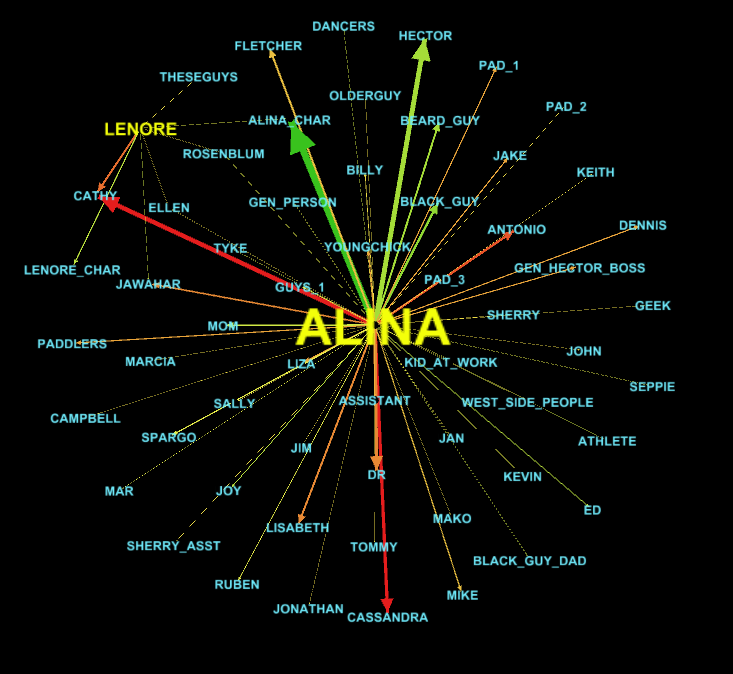

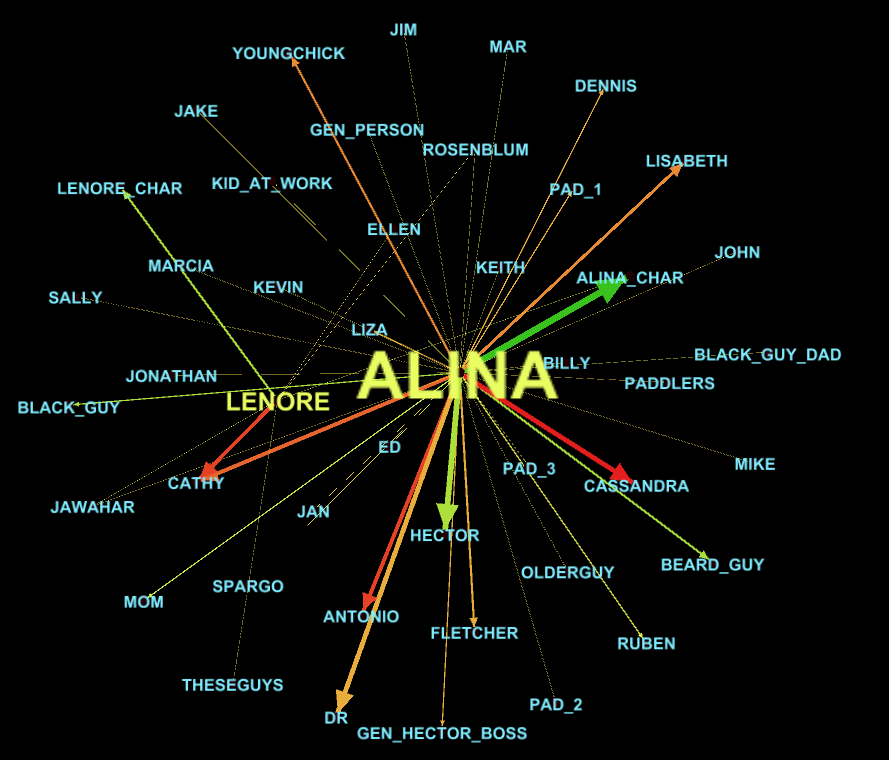

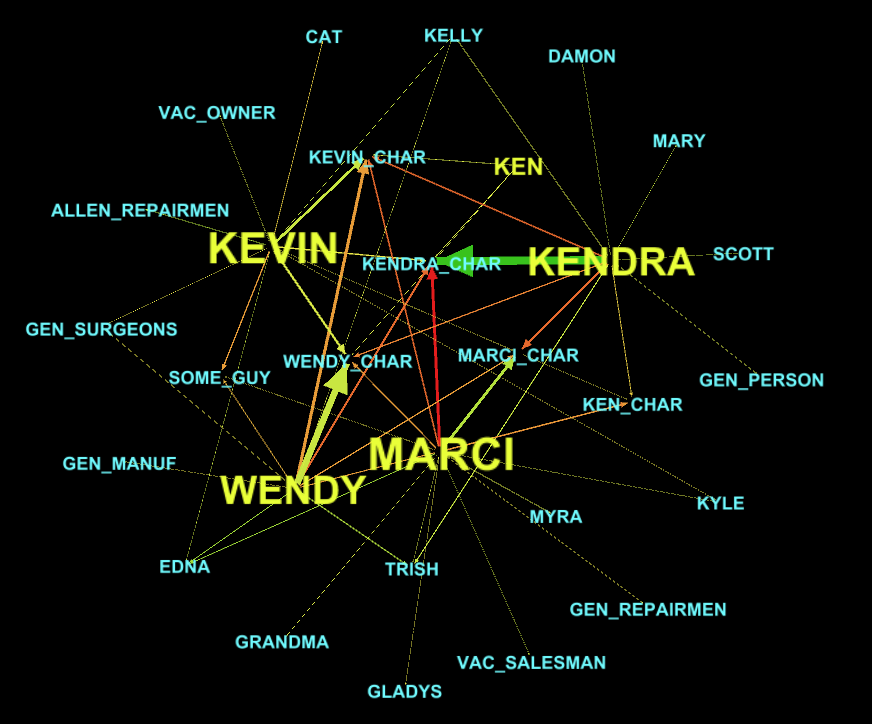

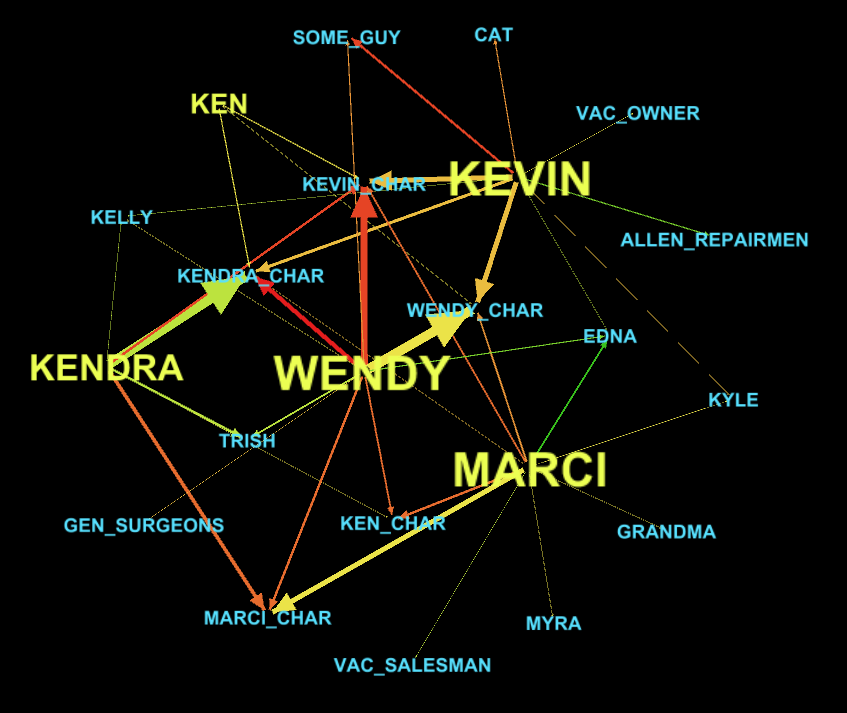

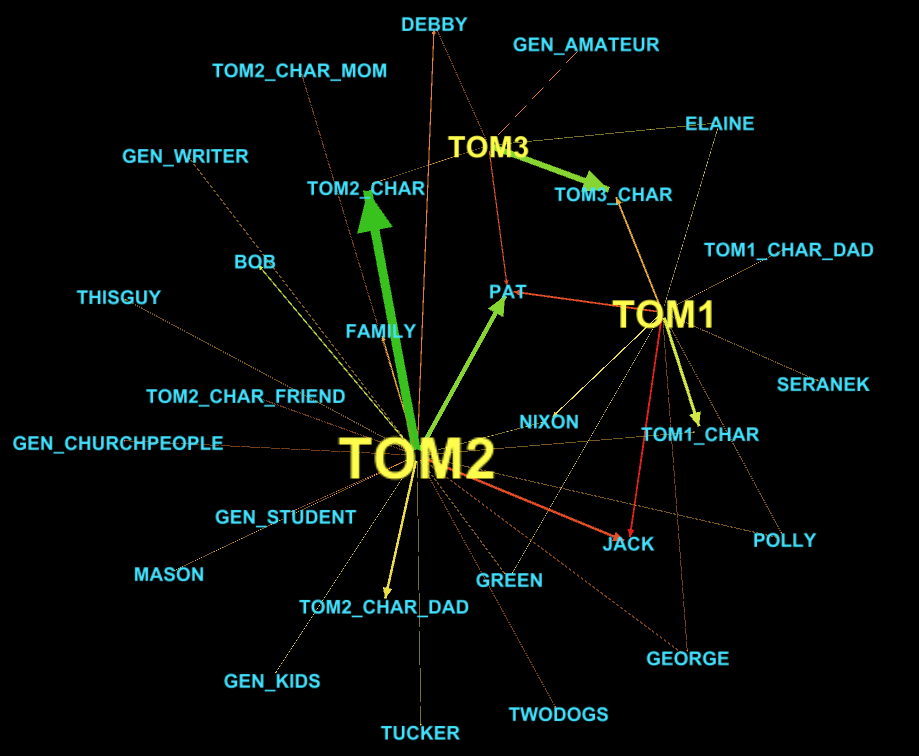

In [27]:
filepath="C:/Users/Leah/Desktop/Com674_Spring2020/Final_Project/Diagrams/"
for diagram in os.listdir(filepath):
    #print(diagram)
    display(Image(filename=filepath+str(diagram)))

Again, for now I mention only one point from these visualizations that strikes me as interesting: the "accepted" diagram of SBC013 (with Kendra, Ken, Marci, Wendy, and Kevin) has ties with neutral to negative valence between the participants, including from speakers to themselves as subjects. In conversation analysis, negative assessments of oneself are commonly considered to have disagreement as the preferred response (see Pomerantz 1984). That is, it's usually thought that if we say something bad about ourselves or our family members, we want our conversational partners to disagree and tell us no, we're actually wonderful. In this particular conversation, however, the family members frequently tease one another. Positive, sincere evaluations are regularly rejected, while humorously overblown negative evaluations get enthusiastic approval. Below is an example. In lines 1-3 Wendy repeats a positive evaluation of her past actions, opening a present before giving it to Kendra, that she first stated earlier in the conversation. It was ignored before, and as it again fails to gain traction here, she switches to a jokingly over-negative evaluation of Kendra. This is strongly accepted with laughter as others join in on the joke. 

<i>EXAMPLE 5: "She'll Sue Me" (SBC13:931.38-944.78)</i><br>
```
1)  WEN:   I've gotta check this stuff ou:t,
2)         an-cause if it's, like, gonna be ju:nk,
3)         I'm not gonna give it to [Kendra, be]cause,
4)  KDR:                            [(SNEEZE)]
5)         ()
6)  KEN:   bless you
7)  WEN:   she'll ↑break↑ it.
8)         () 
9)  MRC:   [ahheheheh]
10) WEN:   [An then she'll] cut hersel:f, and blame it on me:.
11)        ()
12)        So:,
13) KEV:   [tyuhehe]
14) KDR:   [Yeah, r(h)eal][ly.]
15) KEN:    	             [uhheh] [heh heh]
16) MRC:                  [That's][ri:ght].
17) WEN:                          [She'll] [↑sue↑ me:].
18) MRC:                                   [She does that all:] the ti:me.
```

In [28]:
Audio("../Audio/zsueme.mp3")

In SBC032, on the other hand, Tom3's negative evaluations of his daughter Pat do follow the expected pattern: the other Toms reject most of those evaluations. Tom1 and Tom2, though, are neighbors, not members of Tom3's family or even particularly close friends with him. This discourse-internal network analysis, then, may suggest an additional nuance to the expected "negative self-assessment --> disagreement" pattern, based on the closeness of the conversational partners. 

<b>7. Conclusion and Future Directions</b> <br>
My goals in this project were to lay out the concepts underlying discourse-internal network analysis, program adaptations and elaborations of descriptive SNA measures to be suitable for such analysis, and to show through the use of those measures and through visualizations that such analysis allows for new approaches to understanding natural-language conversation. I believe I have accomplished these goals. 

My plans for future work are to extend this project in three different directions, one theoretical, one statistical, and one computational. The theoretical direction involves working out the different ways that evaluation of a narrated character does or does not carry over into positioning of a person in the narrating context. I took the first steps in this direction in a project for Conversation Analysis with Dr. Roberts this semester, by constructing a typlogy of speech involving voicing of narrated characters and describing the relationship between evaluation and positioning for each type (available on request). The statistical direction involves adapting or constructing statistical tests for discourse-internal network analysis, along the same lines as the work done here. This would allow me to determine whether, for example, Speaker A has a statistically significant difference in degree centrality or self-determination from Speaker B. This is one of my main goals for this summer. The computational direction involves automating, to the extent possible, extraction of evaluation and positioning data from audio recordings of conversation (that is, the preparatory work that I did here by hand-coding the transcripts). Specifics of what such automatic extraction would require, and potential opportunities and pitfalls in that process, are also outlined in the Conversation Analysis paper. 

Ultimately, I want to be able to use the discourse-internal characteristics of a network as the independent variables to investigate the relationship between positioning and language change. Given a group of people who meet regularly over time, are the leaders in positioning also the leaders of phonological sound change? Answering this question is the driving force behind the entire series of projects, and at this point seems liable to be my dissertation, or maybe my career. 

<b>8. Works Cited</b><br>

Androutsopoulos, Jannis. 2013. “Networked multilingualism: Some language practices on Facebook and their implications.” International Journal of Bilingualism 0(0):1-21.

Bakhtin, M.M. 1981. “On Polyphony and Heterogeneity.” The Dialogic Imagination: Four Essays by M.M. Bakhtin. Austin, TX: University of Texas Press.

Dodsworth, Robin and Richard A. Benton. 2017. “Social network cohesion and the retreat from southern vowels in Raleigh.” Language in Society 46:371-405.

Du Bois, John W., Wallace L. Chafe, Charles Meyer, Sandra A. Thompson, Robert Englebretson, and Nii Martey. 2000-2005. Santa Barbara corpus of spoken American English, Parts 1-4. Philadelphia: Linguistic Data Consortium.

Goffman, Erving. 1981. Forms of Talk. Philadelphia, PA: University of Pennsylvania Press.

Hagberg, Aric A., Daniel A. Schult and Pieter J. Swart. 2008.  “Exploring network structure, dynamics, and function using NetworkX.” In Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), Proceedings of the 7th Python in Science Conference (SciPy2008). Pasadena, CA USA . 

Luke, Douglas A. 2015. A User’s Guide to Network Analysis in R. Switzerland: Springer International Publishing.

MacWhinney, B. 2000. The CHILDES Project: Tools for Analyzing Talk. 3rd Edition. Mahwah, NJ: Lawrence Erlbaum Associates.

Milroy, Lesley. 1980. Language and social networks. Oxford: Blackwell.

Nodar, Leah. 2019. We are Just Talking About One Car: Legal and Lay Linguistic Practice in Civil Forfeiture Hearings. Master’s thesis.

Pomerantz, Anita. 1984. “Agreeing and disagreeing with assessments: some features of preferred/dispreferred turn shapes.” In Atkinson, J. Maxwell and Heritage, John (Eds.) Structures of Social Action: Studies in Conversation Analysis. Cambridge: Cambridge University Press.

Tannen, Deborah. 1985. “‘Oh talking voice that is so sweet’: constructing dialogue in conversation.” In: Talking Voices. New York, NY: Cambridge University Press. 

Wortham, Stanton and Angela Reyes. 2015. Discourse Analysis beyond the Speech Event. Routledge: New York, NY.
